In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = ('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_sdata/')

import os
os.chdir(path)

In [2]:
df_raw = pd.read_csv('df_raw_v2.csv')

In [3]:
df_raw.head()

,SEQN,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,depressed,caffeine,...,diastolic_BP,BMI,waist_C,year,#meals_fast_food,min_sedetary,doc_HPV,bone_mineral_density,difficult_hearing,doc_COPD
0,31131.0,4.0,4.0,4.0,44.0,2.0,1.0,11.0,0.0,1.300000e+01,...,74.0,30.90,96.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
1,31132.0,3.0,5.0,2.0,70.0,1.0,1.0,11.0,0.0,2.600000e+02,...,60.0,24.74,96.5,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
2,31134.0,3.0,3.0,2.0,73.0,1.0,1.0,NaN,0.0,1.420000e+02,...,68.0,30.63,117.1,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
3,31139.0,2.0,NaN,3.0,18.0,2.0,5.0,11.0,0.0,5.397605e-79,...,64.0,29.45,84.0,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN
4,31143.0,3.0,NaN,3.0,19.0,1.0,5.0,11.0,0.0,5.397605e-79,...,62.0,22.57,84.2,2005-2006,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# bring year and target col to the beginning of df
year = df_raw.pop('year')
df_raw.insert(1, 'year', year)

dep = df_raw.pop('depressed')
df_raw.insert(2, 'depressed', dep)

# drop marijuana use
df_raw.drop(['used_marijuana'],axis=1, inplace=True)

In [5]:
df_raw.head()

,SEQN,year,depressed,race_ethnicity,edu_level,#_ppl_household,age,gender,marital_status,annual_HI,...,systolic_BP,diastolic_BP,BMI,waist_C,#meals_fast_food,min_sedetary,doc_HPV,bone_mineral_density,difficult_hearing,doc_COPD
0,31131.0,2005-2006,0.0,4.0,4.0,4.0,44.0,2.0,1.0,11.0,...,144.0,74.0,30.90,96.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31132.0,2005-2006,0.0,3.0,5.0,2.0,70.0,1.0,1.0,11.0,...,138.0,60.0,24.74,96.5,NaN,NaN,NaN,NaN,NaN,NaN
2,31134.0,2005-2006,0.0,3.0,3.0,2.0,73.0,1.0,1.0,NaN,...,130.0,68.0,30.63,117.1,NaN,NaN,NaN,NaN,NaN,NaN
3,31139.0,2005-2006,0.0,2.0,NaN,3.0,18.0,2.0,5.0,11.0,...,110.0,64.0,29.45,84.0,NaN,NaN,NaN,NaN,NaN,NaN
4,31143.0,2005-2006,0.0,3.0,NaN,3.0,19.0,1.0,5.0,11.0,...,108.0,62.0,22.57,84.2,NaN,NaN,NaN,NaN,NaN,NaN


# Handling Missing Values

In [6]:
def nan_helper(df):
    """
    The NaN helper

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN (index), 
    raw number missing, and their proportion
    
    """
    
    
    # get the raw number of missing values & sort
    missing = df.isnull().sum().sort_values(ascending=True)
    
    # get the proportion of missing values (%)
    proportion = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=True)
    
    # create table of missing data
    nan_data = pd.concat([missing, proportion], axis=1, keys=['missing', 'proportion'])
    
    return nan_data

In [7]:
nan_df = nan_helper(df_raw)

In [39]:
nan_df.head(23)

,missing,proportion
SEQN,0,0.000000
year,0,0.000000
depressed,0,0.000000
race_ethnicity,0,0.000000
#_ppl_household,0,0.000000
age,0,0.000000
gender,0,0.000000
how_healthy_diet,0,0.000000
vigorous_activity,3,0.000096
moderate_activity,6,0.000191


In [22]:
#continuous features
cont = ['#_ppl_household', 'age', 'triglyceride','caffeine', 'lifetime_partners',
       'glycohemoglobin', 'CRP', 'tot_cholesterol','systolic_BP','diastolic_BP', 'BMI', 'waist_C', '#meals_fast_food',
       'min_sedetary', 'bone_mineral_density']

# categorical features
cat = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI',
       'doc_diabetes', 'how_healthy_diet', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'alcoholic','herpes_2', 'HIV', 'doc_HPV','difficult_hearing', 'doc_COPD']

# target binary feature
target = 'depressed'



## Function for dropping col/row and mean/median/mode imputation

In [23]:
def missing_values(df, threshold_col, threshold_row, impute_type):
    """
    Handle Missing Values

    Parameters
    ----------
    df : dataframe
    threshold_col: the proportion of missing values at which  to drop whole column
    threshold_row: the proportion of missing values at which to drop rows
    impute_type: mean or median imputation for continuous variables
    
    Returns
    ----------
    The dataframe without missing values
    
    """
    
    # Dropping Cols and Rows
    # call NaN helper function
    df_nan = nan_helper(df)
        
    # drop columns with higher proportion missing than threshold col
    df = df.drop((df_nan[df_nan['proportion'] > threshold_col]).index,1)
    
    # drop rows with higher proportion missing than threshold row
    df_nan_2 = df_nan[df_nan['proportion']>threshold_row]
    df = df.dropna(subset=np.intersect1d(df_nan_2.index, df.columns),
                           inplace=False)
    

    
    # Imputing values
    # Impute continuous variables with mean 
    if impute_type == 'mean':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].mean(), inplace=True)
    # Impute continuous variables with median
    elif impute_type == 'median':
        for col in cont:
            if col in df.columns:
                df[col].fillna(df[col].median(), inplace=True)
    
    
    # Impute categorical variables with most frequent/mode
    for col in cat:
        if col in df.columns:
            df[col].fillna(df[col].value_counts().index[0], inplace=True)
    

    return df

In [114]:
# example input
df_new = missing_values(df_raw, 0.5, 0.5, "mean")

In [115]:
df_new.shape

(31357, 47)

## Build models to predict missing values

### Encoding multi-category variables

In [10]:
# get mutli-category features
cat_encode = ['race_ethnicity', 'edu_level', 'gender', 'marital_status', 'annual_HI','how_healthy_diet', 'sexual_orientation']

In [24]:
# Function to One-hot-encode the categorical features
def one_hot_encode(df):
    # features
    cols = df.columns[:-1]
    e_cols = list(set(cols).intersection(set(cat_encode)))
    df_encode = pd.get_dummies(df, columns=e_cols)

    return (df_encode)

### Standardize continuous features

In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [26]:
# function to scale specified columns
def scale(df):
    cols = df.columns
    s_cols = list(set(cols).intersection(set(cont_scale)))
    for c in s_cols:
        df[c] = ss.fit_transform(df[[c]])
        
    return df

### KNN imputation

In [ ]:
# try this

### MLP to impute data

Logic:
- In the missing value function, have option for mean, median, MLP, etc.
- take complete data without NAs, and make that training data
- The first col to have missing values make those the target
- Then input those predicted values and do the same for the next col of missing values
- until all values are imputed

In [29]:
from sklearn.preprocessing import LabelEncoder
# The LabelEncoder
le = LabelEncoder()

from sklearn.preprocessing import StandardScaler
# The StandardScaler
ss = StandardScaler()

from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='relu',solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)


In [31]:
df_copy = df_raw.copy()

#### Example of predicting and imputing back into df for next col

In [40]:
# handling identifiers
df_start = df_copy[nan_df.iloc[2:9,].index]

# get the target name
target = df_start.columns[-1]


# Function to One-hot-encode the categorical features
def one_hot_encode(df):
    cols = df.columns[:-1]
    e_cols = list(set(cols).intersection(set(cat_encode)))
    df_encode = pd.get_dummies(df, columns=e_cols)

    return (df_encode)

# call encoding function for categorical features
df_1 = one_hot_encode(df_start)


# Encode the categorical target in the combined data
if target in cat_encode:
    df_1[target] = le.fit_transform(df_1[target].astype(str))
    
# get the name of the features
features = np.setdiff1d(df_1.columns, [target])


# Get NaN rows
null_data = df_1[df_1.isnull().any(axis=1)]

# drop target from NaN rows to get what rows we want to impute
imp = null_data[features].to_numpy()

# drop Na rows from df
df_1 = df_1.dropna()

# split into training and target
X_train = df_1[features].to_numpy()
y_train = df_1[target].astype(int).to_numpy()

# Standardize the training data
X_train = ss.fit_transform(X_train)

clf.fit(X_train, y_train)

predictions = clf.predict(imp)


# now fill the new df with predicted
#df_new = df_raw[nan_df.iloc[2:10,].index]
fill = pd.DataFrame(index =df_start.index[df_start.isnull().any(axis=1)], data=predictions,columns=[target])


In [33]:
d = df_copy.fillna(fill)

In [34]:
sum(d['vigorous_activity'].isnull())

0

#### Make into a function for all columns

In [29]:

def impute_mlp(df, nan_df):

    predictions = []
    target = None
    df_copy=df

    for i in range(9,len(nan_df)+1):
        # handling identifiers
        df_start = df_copy[nan_df.iloc[2:i, ].index]

        # get the target name
        target = df_start.columns[-1]

        # Function to One-hot-encode the categorical features
        def one_hot_encode(df):
            cols = df.columns[:-1]
            e_cols = list(set(cols).intersection(set(cat_encode)))
            df_encode = pd.get_dummies(df, columns=e_cols)

            return (df_encode)

        # call encoding function for categorical features
        df_1 = one_hot_encode(df_start)

        # Encode the categorical target in the combined data
        if target in cat_encode:
            df_1[target] = le.fit_transform(df_1[target].astype(str))

        # get the name of the features
        features = np.setdiff1d(df_1.columns, [target])

        # Get NaN rows
        null_data = df_1[df_1.isnull().any(axis=1)]

        # drop target from NaN rows to get what rows we want to impute
        imp = null_data[features].to_numpy()

        # drop Na rows from df
        df_1 = df_1.dropna()

        # split into training and target
        X_train = df_1[features].to_numpy()
        y_train = df_1[target].astype(int).to_numpy()

        # Standardize the training data
        X_train = ss.fit_transform(X_train)

        clf.fit(X_train, y_train)

        predictions = clf.predict(imp)

        fill = pd.DataFrame(index=df_start.index[df_start.isnull().any(axis=1)],
                            data=predictions, columns=[target])
        df_copy = df_copy.fillna(fill)


    return df_copy


In [36]:
# imputed = impute_mlp(df_raw, nan_df)

#### trying other ways - recursion, global variables

In [37]:
def impute_mlp(df_raw, nan_df):
    global df_imp
    df_imp = pd.DataFrame()
    global pred
    pred = 0
    for i in range(9,len(nan_df)+1):
        
        df_start = df_raw[nan_df.iloc[2:i,].index]
        
        imp_recursive(df_start, pred)

    return df_imp


def imp_recursive(df_start, pred):
        
        if len(predictions)>0:
            df = df.fillna(fill)
    
        # get the target name
        target = df_start.columns[-1]
        
        df_start = df_start.reset_index()

        # Function to One-hot-encode the categorical features
        def one_hot_encode(df):
            cols = df.columns[:-1]
            e_cols = list(set(cols).intersection(set(cat_encode)))
            df_encode = pd.get_dummies(df, columns=e_cols)

            return (df_encode)

        # call encoding function for categorical features
        df_1 = one_hot_encode(df_start)

        # Encode the categorical target in the combined data
        if target in cat_encode:
            df_1[target] = le.fit_transform(df_1[target].astype(str))

        # get the name of the features
        features = np.setdiff1d(df_1.columns, [target])

        # Get NaN rows
        null_data = df_1[df_1.isnull().any(axis=1)]

        # drop target from NaN rows to get what rows we want to impute
        imp = null_data[features].to_numpy()

        # drop Na rows from df
        df_1 = df_1.dropna()
        df_1 = df_1.reset_index()

        # split into training and target
        X_train = df_1[features].to_numpy()
        y_train = df_1[target].astype(int).to_numpy()

        # Standardize the training data
        X_train = ss.fit_transform(X_train)

        clf.fit(X_train, y_train)

        pred = clf.predict(imp)
        
        fill = pd.DataFrame(index=df_start.index[df_start.isnull().any(axis=1)], 
                                data=predictions, columns=[target])
        
        df_imp.fillna(fill)

### Keras version 

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


Using TensorFlow backend.


In [47]:
# %% ----------------------------------- Hyper Parameters --------------------------------------------------------------
# It is always good practice to set the hyper-parameters at the beginning of the script
# And even better to define a params class if the script is long and complex
LR = 0.1
N_NEURONS = 10
N_EPOCHS = 50000

# %% -------------------------------------- Data Prep ------------------------------------------------------------------
# Gets the input interval and the targets
# p = np.linspace(1, 12, ) # this is the range of the output, how many points? 
# t = df_raw['annual_HI'].notna() # targets are non-na?

# %% -------------------------------------- Training Prep --------------------------------------------------------------
# Defines the model
model = Sequential([
    Dense(N_NEURONS, input_dim=1),  # Linear layer that maps 1 input dim to N_NEURONS hidden dim
    Activation("sigmoid"),  # Sigmoid hidden transfer function
    Dense(1)  # Maps N_NEURONS hidden dim to 1 output dim
])
# Prepares a Stochastic Gradient Descent optimizer and a Mean Squared Error performance index
model.compile(optimizer=SGD(lr=LR), loss="mean_squared_error")

# %% -------------------------------------- Training Loop --------------------------------------------------------------
# Trains the model. We use full Batch GD.
train_hist = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=len(X_train))

predictions = model.predict(imp)

#fill = pd.DataFrame(index=df_start.index[df_start.isnull().any(axis=1)],
                            #data=predictions, columns=[target])
#df_copy = df_copy.fillna(fill)



# %% -------------------------------------- Check Approx ---------------------------------------------------------------
# Visually shows the approximation obtained by the MLP
# plt.title("MLP fit to $y = e^x - sin(2 \\pi x)$ | MSE: {:.5f}".format(train_hist.history["loss"][-1]))
# plt.xlabel("x")
# plt.ylabel("y")
# plt.plot(p, t, label="Real Function")
# plt.plot(p, model.predict(p), linestyle="dashed", label="MLP Approximation")
# plt.legend()
# plt.show()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               8704      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 276,490
Trainable params: 276,490
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected dense_12 to have 2 dimensions, but got array with shape (31354, 10, 10)

# EDA Plots/Visuals

In [16]:
df_raw.columns

Index(['SEQN', 'depressed', 'race_ethnicity', 'edu_level', '#_ppl_household',
       'age', 'gender', 'marital_status', 'annual_HI', 'caffeine',
       'doc_diabetes', 'how_healthy_diet', 'used_marijuana', 'used_CMH',
       'health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip',
       'doc_osteoporosis', 'vigorous_activity', 'moderate_activity',
       'doc_sleeping_disorder', 'smoker', 'sexual_orientation',
       'lifetime_partners', 'alcoholic', 'triglyceride', 'tot_cholesterol',
       'glycohemoglobin', 'herpes_2', 'HIV', 'CRP', 'systolic_BP',
       'diastolic_BP', 'BMI', 'waist_C', 'year', '#meals_fast_food',
       'min_sedetary', 'doc_HPV', 'bone_mineral_density', 'difficult_hearing',
       'doc_COPD'],
      dtype='object')

In [17]:
demo = ['race_ethnicity', 'edu_level', '#_ppl_household', 'age',
       'gender', 'marital_status', 'annual_HI', 'depressed', 'health_insurance']

diagnoses = ['depressed','doc_diabetes','health_insurance', 'doc_asthma', 'doc_overweight', 'doc_arthritis',
       'doc_CHF', 'doc_CHD', 'doc_heart_attack', 'doc_stroke',
       'doc_chronic_bronchitis', 'doc_liver_condition', 'doc_thyroid_problem',
       'doc_cancer', 'difficult_seeing', 'doc_kidney', 'broken_hip', 'doc_sleeping_disorder',
       'doc_osteoporosis', 'doc_COPD','doc_HPV', 'difficult_hearing']

lifestyle = ['depressed', 'caffeine', 'how_healthy_diet', '#meals_fast_food', 'used_marijuana', 'used_CMH', 
                'smoker', 'sexual_orientation','lifetime_partners', 'alcoholic',
            'min_sedetary', 'vigorous_activity', 'moderate_activity']

laboratory = ['depressed', 'triglyceride', 'tot_cholesterol',
       'glycohemoglobin', 'herpes_2', 'HIV', 'CRP', 'systolic_BP',
       'diastolic_BP', 'BMI', 'waist_C', 'bone_mineral_density', ]

In [18]:
df_demo = df_raw[demo]
df_diagnoses = df_raw[diagnoses]
df_lifestyle = df_raw[lifestyle]
df_lab = df_raw[laboratory]

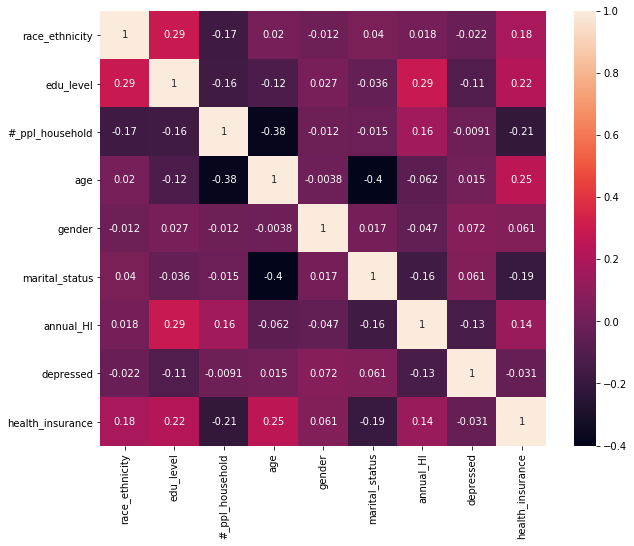

In [19]:
fig=plt.figure(figsize=(10, 8))

sns.heatmap(df_demo.corr(), annot=True)

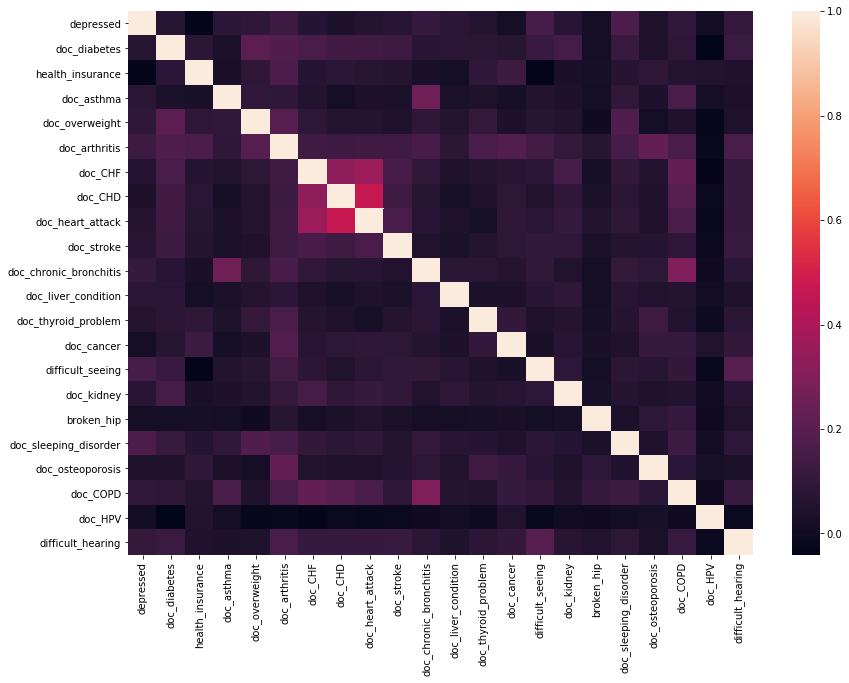

In [20]:
fig=plt.figure(figsize=(14, 10))

sns.heatmap(df_diagnoses.corr())

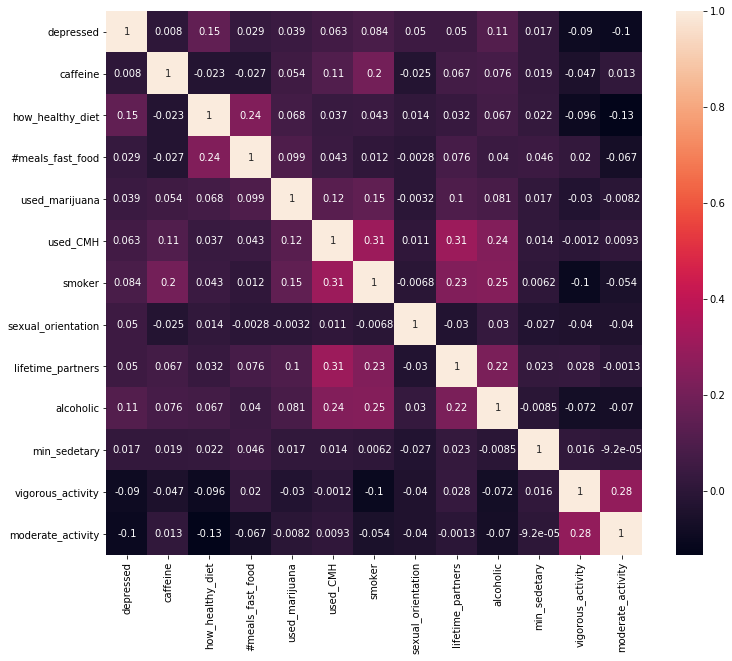

In [21]:
fig=plt.figure(figsize=(12, 10))

sns.heatmap(df_lifestyle.corr(), annot=True)

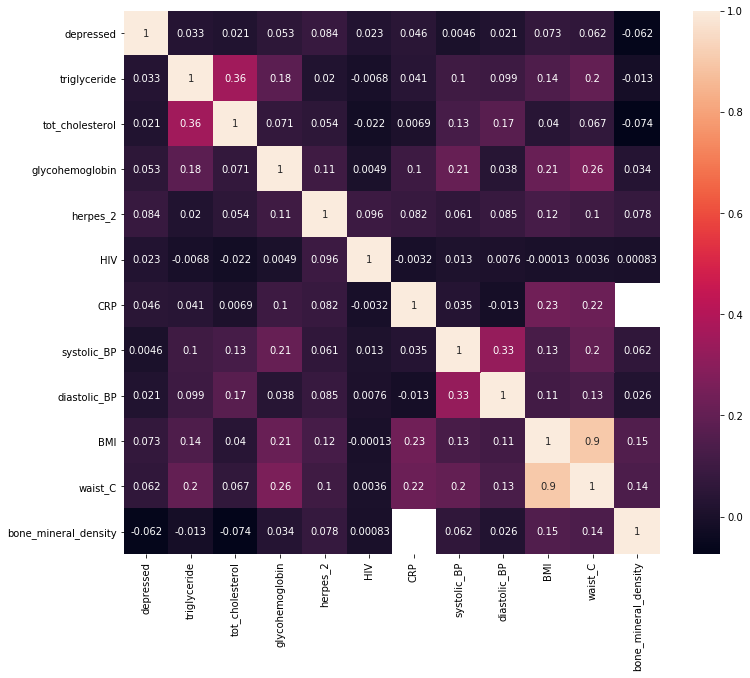

In [23]:
fig=plt.figure(figsize=(12, 10))

sns.heatmap(df_lab.corr(), annot=True)

In [24]:
df_raw.shape

(31357, 54)

In [47]:
# removing some outliers???

df_raw = df_raw.drop(df_raw[df_raw['caffeine'] > 1000].index)
df_raw = df_raw.drop(df_raw[df_raw['lifetime_partners'] > 50].index)
df_raw = df_raw.drop(df_raw[df_raw['tot_cholesterol'] > 400].index)
df_raw = df_raw.drop(df_raw[df_raw['triglyceride'] > 500].index)
df_raw = df_raw.drop(df_raw[df_raw['CRP'] > 5].index)
df_raw = df_raw.drop(df_raw[df_raw['#meals_fast_food'] > 500].index)

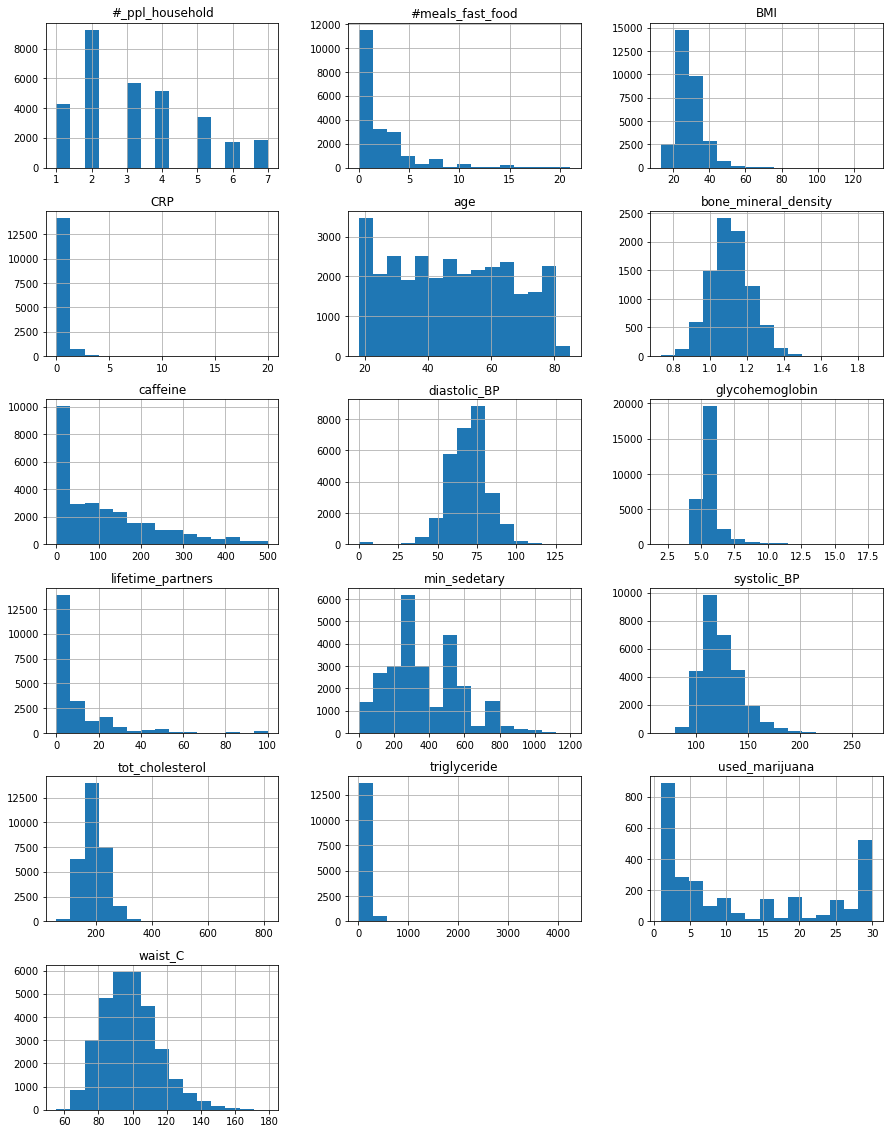

In [25]:
df_raw[cont].hist(bins=15, figsize=(15, 20), layout=(6, 3));

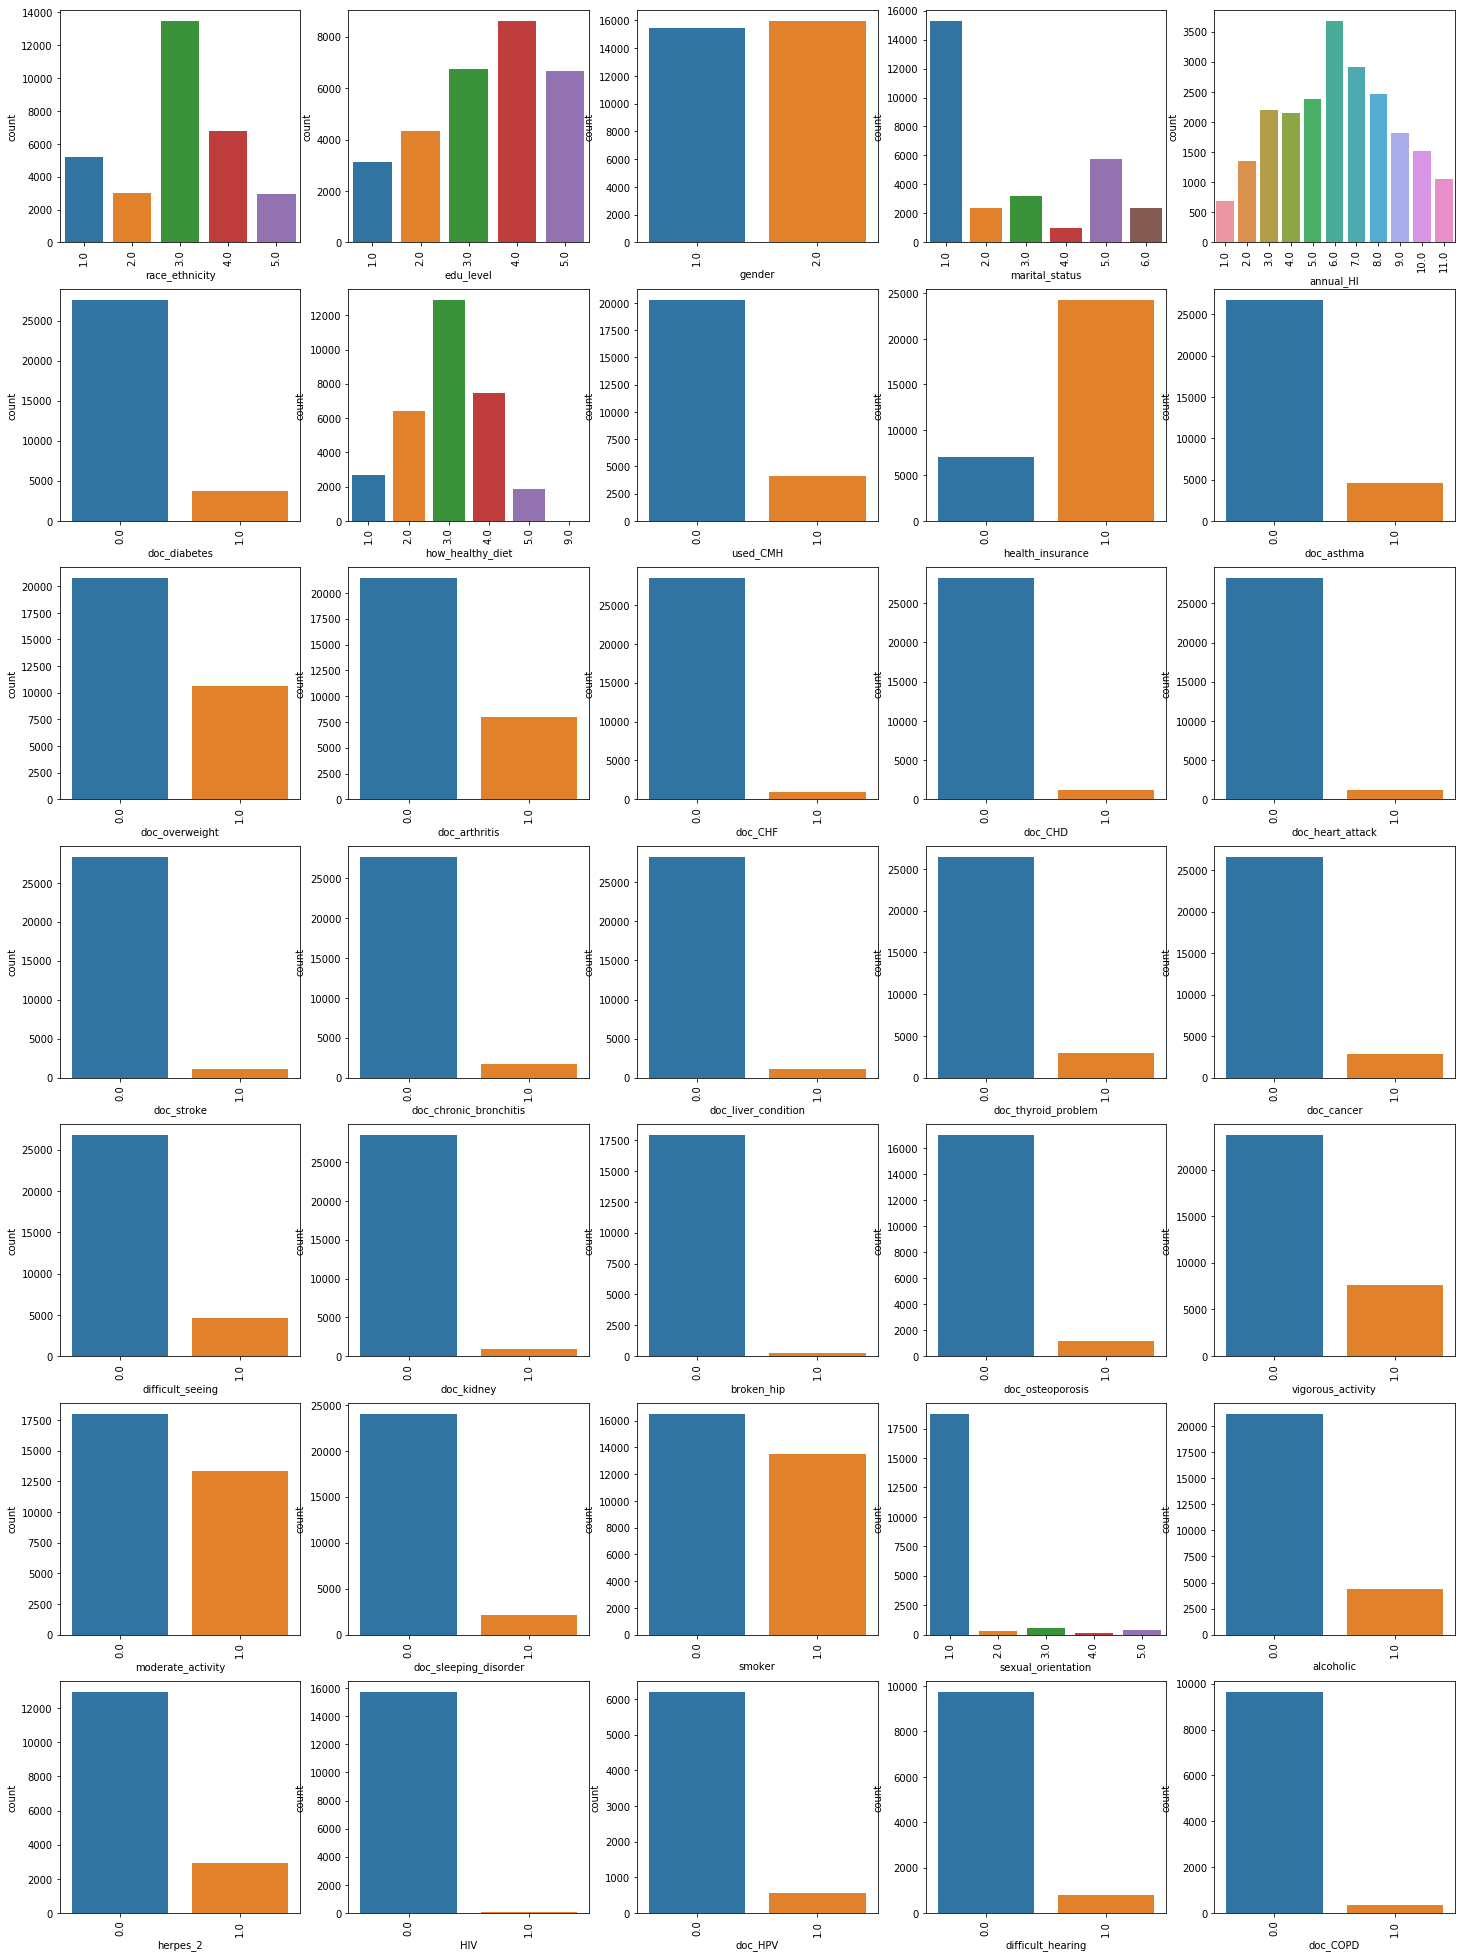

In [26]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))
for var, subplot in zip(cat, ax.flatten()):
    sns.countplot(df_raw[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

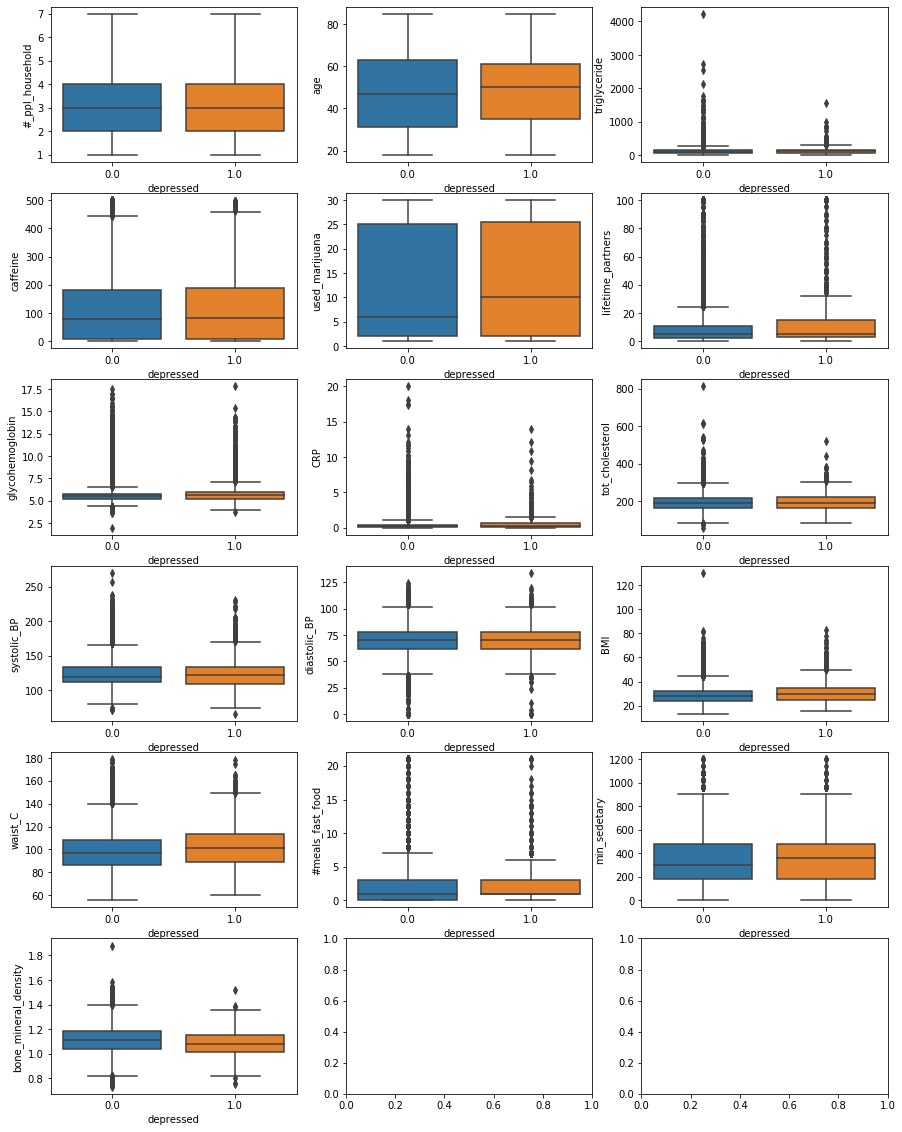

In [27]:
fig, ax = plt.subplots(6, 3,  figsize=(15, 20))
for var, subplot in zip(cont, ax.flatten()):
    sns.boxplot(x='depressed', y=var, data=df_raw, ax=subplot)

In [48]:
df_raw.to_csv('/Users/carolinesklaver/Desktop/Capstone/NHANES/data/csv_data/df_tab_2.csv', index=False)